In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('car_prices.csv')
df.head(3)

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928


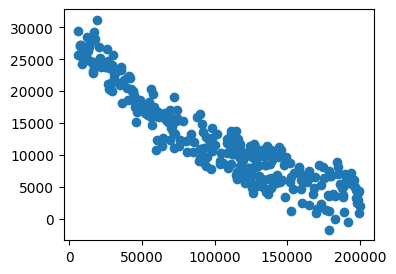

In [7]:
plt.figure(figsize=(4, 3))
plt.scatter(df.mileage, df.selling_price)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df['selling_price']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
X.shape, X_test.shape

((300, 1), (60, 1))

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree=2)
X_training_poly = poly.fit_transform(X_training)
X_test_poly = poly.transform(X_test)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [45]:
model.fit(X_training_poly, y_training)

LinearRegression()

In [46]:
y_pred = model.predict(X_test_poly)

In [48]:
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

mse, r2

(3942449.042820213, 0.9126055611171061)

In [49]:
x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

c:\Users\Ahmad Fahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


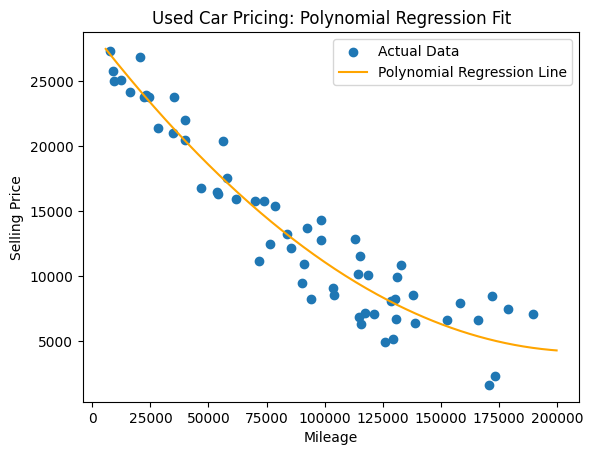

In [50]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()